In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import sounddevice as sd

# q1

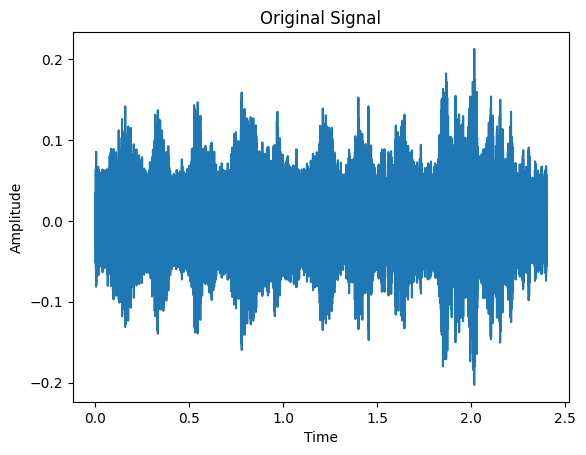

In [2]:
sr, original = read('q1.wav')
time = np.arange(0, len(original)/sr, 1/sr)
plt.plot(time, original)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
sd.play(original, sr)
plt.show()

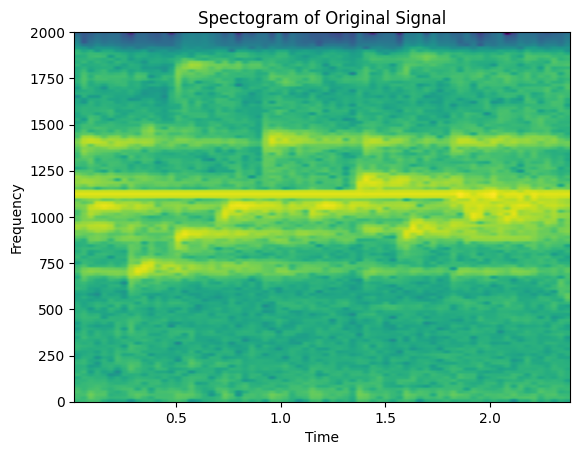

In [3]:
# spectogram of the original signal
plt.specgram(original, Fs=sr)
plt.title('Spectogram of Original Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

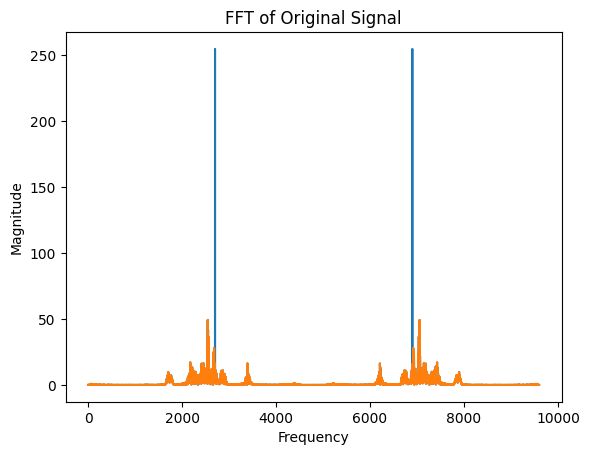

In [4]:
# fft of the original signal
fft = np.fft.fft(original)
magnitude = np.abs(fft)
plt.plot(magnitude)
plt.title('FFT of Original Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
clean_Pxx = magnitude.copy()
clean_Pxx[2700] = (clean_Pxx[2699] + clean_Pxx[2701]) / 2
clean_Pxx[6900] = (clean_Pxx[6899] + clean_Pxx[6901]) / 2
# clean_fft = clean_fft * (1 < clean_fft)
noise_Pxx = magnitude - clean_Pxx
plt.plot(clean_Pxx)
# plt.xlim(1500, 3600)
# plt.ylim(0, 60)
plt.show()

In [5]:
# ifft
clean = np.fft.ifft(clean_Pxx * np.exp(1j * np.angle(fft))).real
sd.play(clean, sr)
sd.wait()
noise = np.fft.ifft(noise_Pxx * np.exp(1j * np.angle(fft))).real
sd.play(noise, sr)


# q2

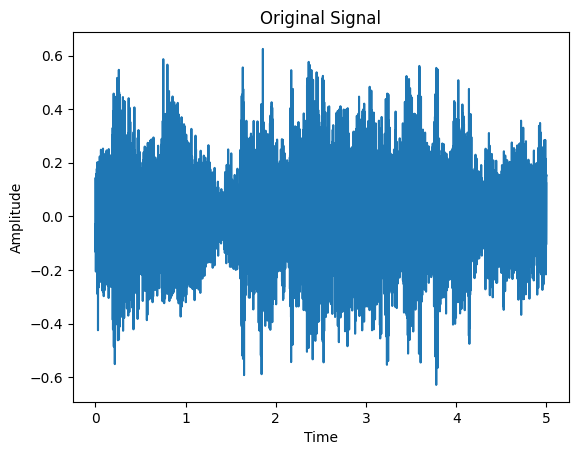

In [8]:
sr, original = read('q2.wav')
time = np.arange(0, len(original)/sr, 1/sr)
plt.plot(time, original)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
sd.play(original, sr)
plt.show()

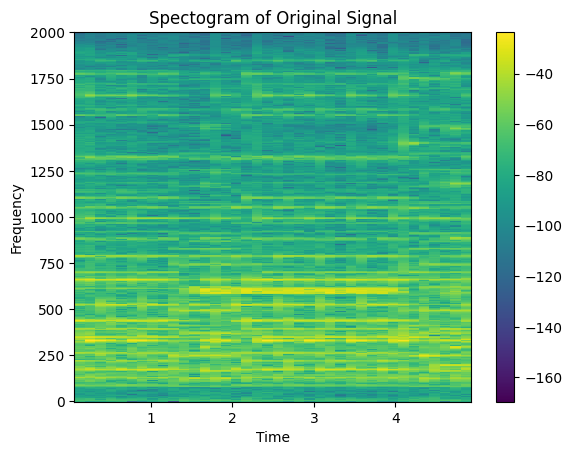

In [69]:
import matplotlib.mlab as mlab

# spectogram of the original signal
Pxx, freqs, t = mlab.specgram(original, NFFT=1024, Fs=sr, noverlap=512)
plt.pcolormesh(t, freqs, 10 * np.log10(Pxx))
plt.title('Spectogram of Original Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
# plt.xlim(1.5, 4)
# plt.ylim(550, 700)
plt.colorbar()
plt.show()

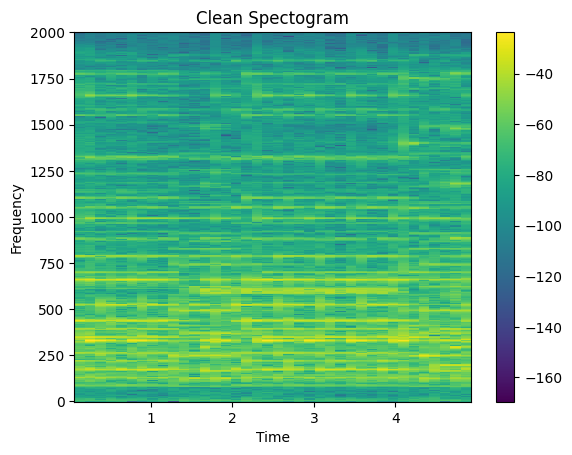

In [50]:
clean_Pxx = Pxx.copy()
noise_freq = 600
noise_freq_indexes = np.where((freqs > noise_freq - 20) & (freqs < noise_freq + 20))
clean_Pxx[noise_freq_indexes] = 0.1 * clean_Pxx[noise_freq_indexes]
noise_Pxx = Pxx - clean_Pxx
plt.pcolormesh(t, freqs, 10 * np.log10(clean_Pxx))
plt.title('Clean Spectogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
# plt.xlim(1.5, 4)
# plt.ylim(550, 700)
plt.colorbar()
plt.show()

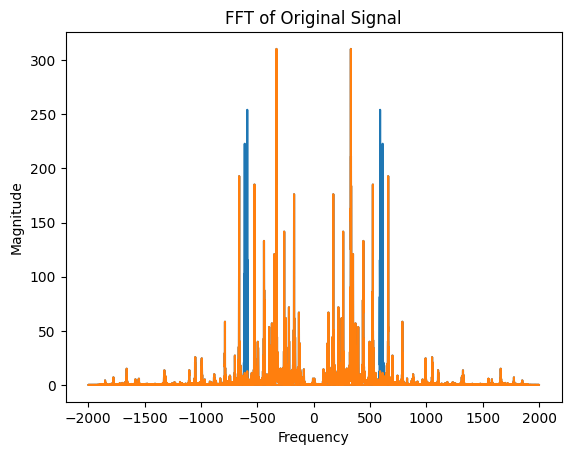

In [73]:
noisy_indexes = np.arange(int(1.5*sr), int(4*sr))
noisy = original[noisy_indexes]


fft = np.fft.fft(noisy)
magnitude = np.abs(fft)
freqs = np.fft.fftfreq(len(noisy), 1/sr)
plt.plot(freqs, magnitude)
noise_freq = 600

noise_freq_indexes = np.where((abs(freqs) > noise_freq - 20) & (abs(freqs) < noise_freq + 20))
clean_fft = magnitude.copy()
clean_fft[noise_freq_indexes] = 0.05 * clean_fft[noise_freq_indexes]
noise_fft = magnitude - clean_fft
plt.plot(freqs, clean_fft)
plt.title('FFT of Original Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

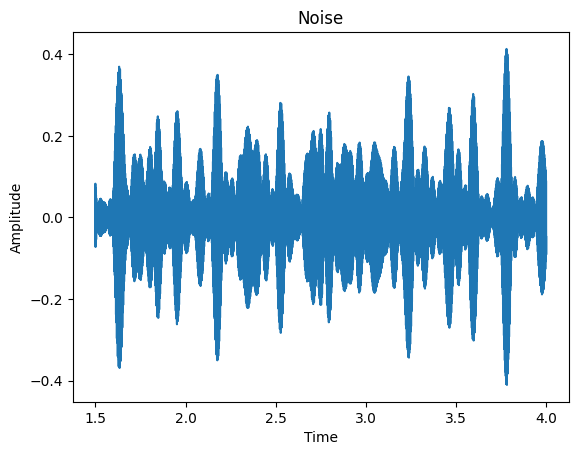

In [74]:
clean = np.fft.ifft(clean_fft * np.exp(1j * np.angle(fft))).real
sd.play(clean, sr)
sd.wait()
noise = np.fft.ifft(noise_fft * np.exp(1j * np.angle(fft))).real
sd.play(noise, sr)
plt.plot(time[noisy_indexes], noise)
plt.title('Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

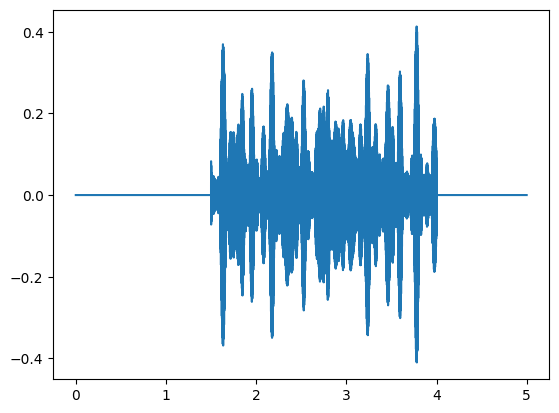

In [75]:
# stack all together
clean = np.concatenate((original[:int(1.5 * sr)] ,clean, original[int(4*sr):]))
sd.play(clean, sr)
sd.wait()
noise = np.concatenate((original[:int(1.5 * sr)]*0 ,noise, original[int(4*sr):]*0))
sd.play(noise, sr)
plt.plot(time, noise)
plt.show()